In [5]:
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import sin, cos, pi
import numpy as np
from scipy.integrate import odeint
from IPython.display import HTML

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 240

from matplotlib import rc

rc('text', usetex=True)

In [9]:
def simple_pendulum_ode(conditions, t, ℓ=20, g=980):
    # state of θ and ω is in the conditions list
    θ, ω = conditions
    
    dydt = [ω, -g/ℓ*sin(θ)]
    return dydt

def real_pendulum_ode(conditions, t, ℓ=20, g=980):
    # state of θ and ω is in the conditions list
    θ, ω = conditions
    
    dydt = [ω, -g/ℓ*θ]
    return dydt

pendulum_ode = simple_pendulum_ode

In [31]:
def plot_generator(θ_inital, ω_inital, time_factor, ℓ, pendulum_ode=pendulum_ode):

    t_list = np.linspace(0, 0.4*3, 60)

    solutions = odeint(pendulum_ode, [θ_inital, ω_inital], t_list)
    # odeint solves for θ and ω over the interval in t_list, it pases conditions = [θ_inital, ω_inital] 
    # for the first call of simple_pendulum_ode().

    θ_solution_list = [i[0] for i in solutions]

    x_0 = 0
    y_0 = 40

    y_list = [y_0 - ℓ*cos(θ) for θ in θ_solution_list]
    x_list = [ℓ*sin(θ) for θ in θ_solution_list]


    lns = []

    for i in range(len(solutions)):    
        g = 9.8

        θ = θ_solution_list[0]

        #force_point, = plt.plot( x_list[i] -  9.8*sin(θ)*cos(θ), y_0 - v_len*ℓ*cos(θ)-9.8*sin(θ)*sin(θ),
         #                            marker=(3, 0, 45 + θ*180/pi), markersize=5, linestyle='None', color = 'r')

        line, = plt.plot([x_0, x_list[0]], [y_0, y_list[0]], color='k', lw=1)
        
        if i < 41:
            gravity = plt.arrow(x_list[0], y_0 - ℓ*cos(θ),
                               0, -g*((i+1)/41),
                               head_width = 1, color = 'blue')
        elif i >= 41: 
            
            gravity = plt.arrow(x_list[0], y_0 - ℓ*cos(θ),
                               0, -g*(1),
                               head_width = 1, color = 'blue')

        #force_pointer, = plt.plot(v_len*x_list[i] -  9.8*sin(θ)*cos(θ), y_0 - v_len*ℓ*cos(θ)-9.8*sin(θ)*sin(θ),
         #                            marker=(3, 0, θ), markersize=5, linestyle='None', color = 'r')
        mass, = plt.plot([x_list[0]], [y_list[0]], 'ro', color = 'royalblue')

        lns.append([line, gravity, mass])

    return lns

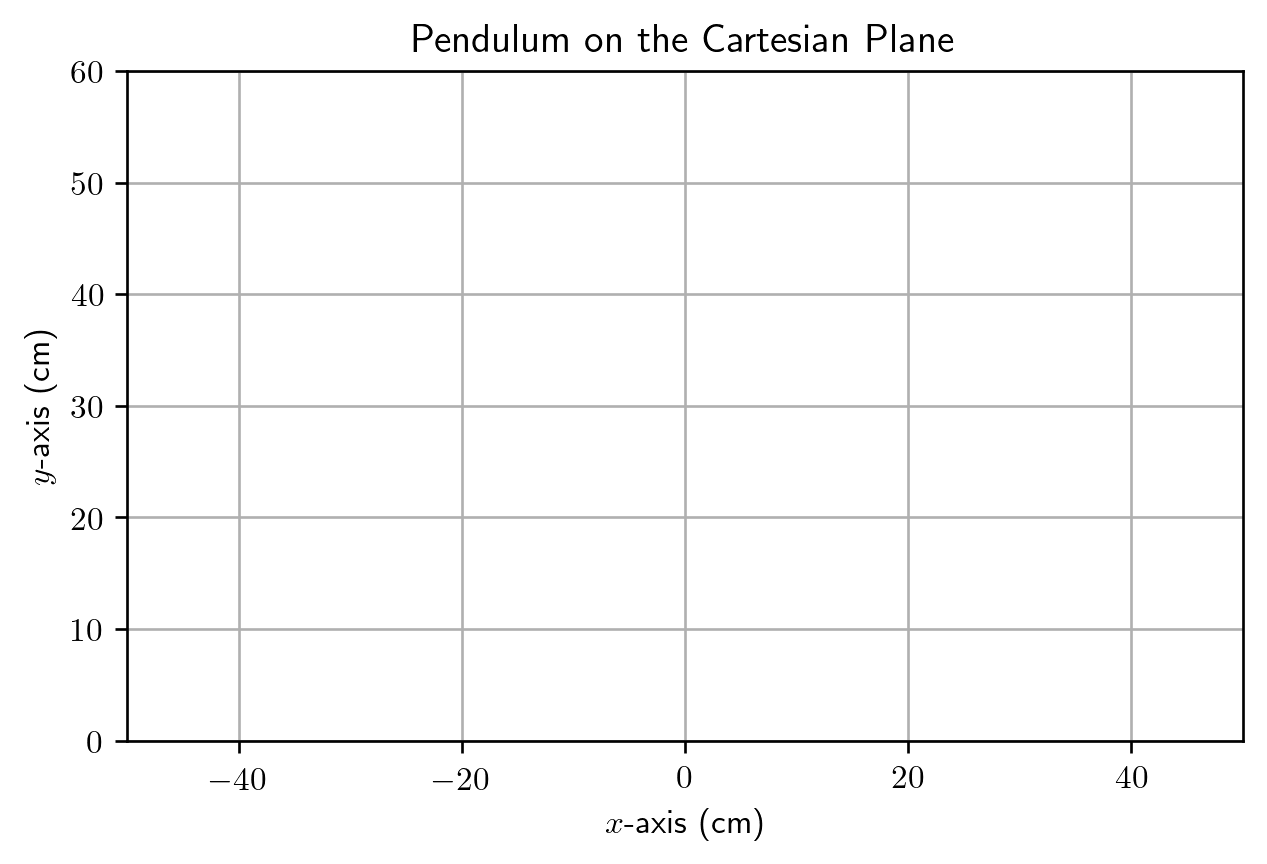

In [32]:

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-50, 50), ylim=(0, 60))
plt.grid()
plt.title('Pendulum on the Cartesian Plane')
plt.xlabel('$x$-axis (cm)')
plt.ylabel('$y$-axis (cm)')

MODEL_TYPE = "SIMPLE"

if (MODEL_TYPE) != "SIMPLE":
    pendulum_ode = real_pendulum_ode
    equation = r'$$\frac{d^2\theta}{dt^2} + \frac{g}{\ell}\sin\theta = 0$$'
else:
    ## MODEL_TYPE == "SIMPLE"
    pendulum_ode = simple_pendulum_ode
    equation = r'$$\frac{d^2\theta}{dt^2} + \frac{g}{\ell}\theta = 0$$'


lns = plot_generator(θ_inital = pi/2 - 0.5,
                     ω_inital = 0.0,
                     time_factor = 4,
                     ℓ = 20
                    )

ani = animation.ArtistAnimation(fig, lns, interval=30)

HTML(ani.to_html5_video())